## CS-506 Project SICK

In [2]:
import pandas as pd
dataset = pd.read_csv("CLx69x_CLV11_cleanest.csv")
#dataset = dataset.drop(['SerialNumber', 'DeviceIdent', 'LocationName', 'FirmwareVersion', 'SCRebootNeedful', 'MaximumTemperatureDevice', 'MaximumTemperatureProcessors' , 'InclinationSensorZeroPosTemperature', 'InclinationSensorT1Temperature', 'InclinationSensorT2Temperature', 'SCdevicestate' ], axis =1 )
dataset.head(1)
dataset['Observation Timestamp'] = dataset['Observation Timestamp'].apply(lambda x: x.split('T')[0])
dataset.dtypes

Unnamed: 0                               int64
Observation Timestamp                   object
DeviceIdent                             object
LocationName                            object
SerialNumber                           float64
FirmwareVersion                         object
PowerOnCnt                             float64
OpHours                                float64
DailyOpHours                           float64
SCRebootNeedful                        float64
SCdevicestate                          float64
CurrentTemperatureDevice               float64
MaximumTemperatureDevice               float64
CurrentTemperatureProcessors           float64
MaximumTemperatureProcessors           float64
InclinationSensorZeroPosTemperature    float64
InclinationSensorT1Temperature         float64
InclinationSensorT2Temperature         float64
dtype: object

In [3]:
dataset['Observation Timestamp'] = pd.to_datetime(dataset['Observation Timestamp'], format='%Y-%m-%d')
dataset.head(1)
dataset = dataset.iloc[:,11:]
dataset.shape

(47803, 7)

In [32]:
dataset_2 = pd.read_csv("test_xmldata.2017-07-25.csv")
dataset_2 = dataset_2[['speed']].dropna(how='any')
dataset_2.shape
#dataset_3 = dataset.merge(dataset_2)
dataset_3 = pd.concat([dataset,dataset_2], axis=1, ignore_index=False)
dataset_3 = dataset_3.fillna(8.0)
dataset_3.head()

C:\Users\kasim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CurrentTemperatureDevice,MaximumTemperatureDevice,CurrentTemperatureProcessors,MaximumTemperatureProcessors,InclinationSensorZeroPosTemperature,InclinationSensorT1Temperature,InclinationSensorT2Temperature,speed
0,53.0,61.0,54.0,63.0,20.0,20.0,20.0,218.11
1,53.0,61.0,54.0,63.0,20.0,20.0,20.0,536.02
2,53.0,61.0,54.0,63.0,20.0,20.0,20.0,536.02
3,53.0,61.0,54.0,63.0,20.0,20.0,20.0,536.02
4,53.0,61.0,54.0,63.0,20.0,20.0,20.0,536.02


In [42]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import Normalizer
X_trn = dataset_3[['CurrentTemperatureDevice', 'MaximumTemperatureDevice', 'CurrentTemperatureProcessors', 'MaximumTemperatureProcessors', 'InclinationSensorZeroPosTemperature', 'InclinationSensorT1Temperature', 'InclinationSensorT2Temperature']]
lsa = TruncatedSVD(6, algorithm = 'randomized')
X_trn = lsa.fit_transform(X_trn)
# normalize category columns and rescale to give location a larger weight
X_trn = Normalizer(copy=False).fit_transform(X_trn)
dataset_3[['speed']] = Normalizer(copy=False).fit_transform(dataset_3[['speed']])

In [43]:
import statsmodels.api as sm
model = sm.OLS(dataset_3[['speed']], X_trn)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 10 Dec 2017   Prob (F-statistic):                nan
Time:                        21:11:31   Log-Likelihood:                    nan
No. Observations:               61888   AIC:                               nan
Df Residuals:                   61888   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
InclinationS

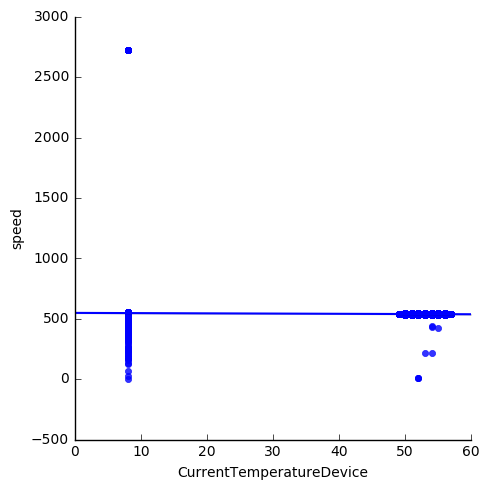

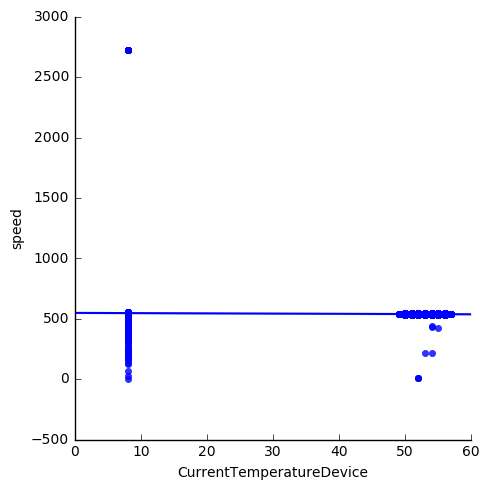

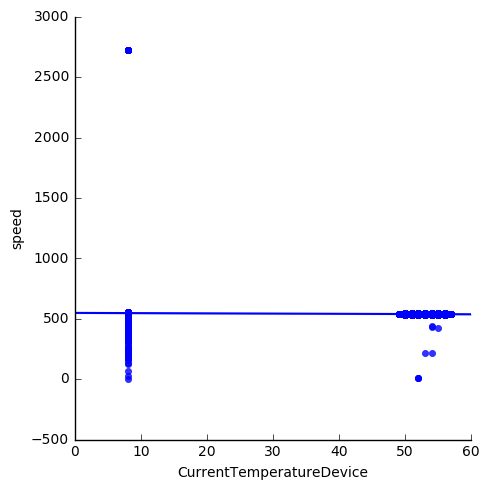

In [40]:
#scatter plot of obect data and sensor data

import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot('CurrentTemperatureDevice', 'speed', data = dataset_3)
plt.show()

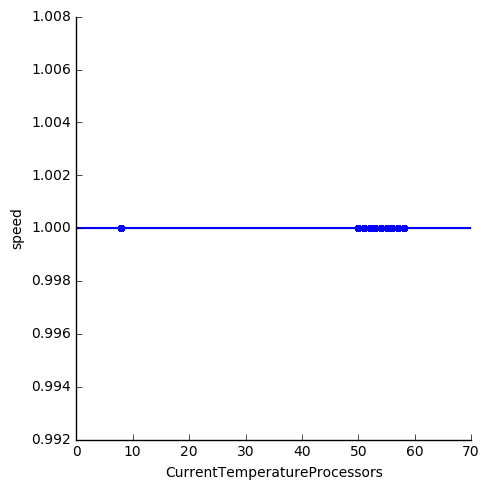

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot('CurrentTemperatureProcessors', 'speed', data = dataset_3)
plt.show()

In [15]:
import pandas as pd
dataset=pd.read_csv("ICR890-3_TOP_cleanest.txt",delimiter="\t")
#dataset = dataset.drop(['SerialNumber', 'DeviceIdent', 'LocationName', 'FirmwareVersion', 'SCRebootNeedful', 'MaximumTemperatureDevice', 'MaximumTemperatureProcessors' , 'InclinationSensorZeroPosTemperature', 'InclinationSensorT1Temperature', 'InclinationSensorT2Temperature', 'SCdevicestate' ], axis =1 )
dataset.to_csv('Op_8.csv')

In [22]:
dataset = pd.read_csv("ICR890-3_TOP_cleanest.csv")
#dataset = dataset.drop(['SerialNumber', 'DeviceIdent', 'LocationName', 'FirmwareVersion', 'SCRebootNeedful', 'MaximumTemperatureDevice', 'MaximumTemperatureProcessors' , 'InclinationSensorZeroPosTemperature', 'InclinationSensorT1Temperature', 'InclinationSensorT2Temperature', 'SCdevicestate' ], axis =1 )
dataset.head(1)

,Unnamed: 0,Observation Timestamp,DeviceIdent,LocationName,SerialNumber,FirmwareVersion,PowerOnCnt,OpHours,DailyOpHours,SCRebootNeedful,...,SILOpHours,SILLedTime,SILSystemTemp,SILSystemVoltage,SILSystemCurrent,SILIntensity,CurrentFanSpeedLamp,ePerformMinLoad,ePerformMaxLoad,eLampOn
0,0,2017-07-14T11:08:58.000,"{""Version"":""V4.5.0.4"",""Name"":""ICR890-3""}",TOP,16510116.0,V 4.4.0.6,37.0,37955.0,80.15684,0.0,...,54904.0,"[21121,21121,21121,21121,21121]","{""Temperature"":31,""DCCTemp"":[27,28,28,28,28]}","{""LEDVoltage"":[4,4,4,4,4],""SupplyVoltage"":26}","{""PhotoCurrent"":[3240,3201,3210,3217,3248],""LE...","[100,100,100,100,100]",3333.0,"{""Increment"":22792,""Value"":1,""Timestamp"":16578...","{""Increment"":22792,""Value"":2,""Timestamp"":16578...","{""Increment"":18748,""Value"":false,""Timestamp"":2..."


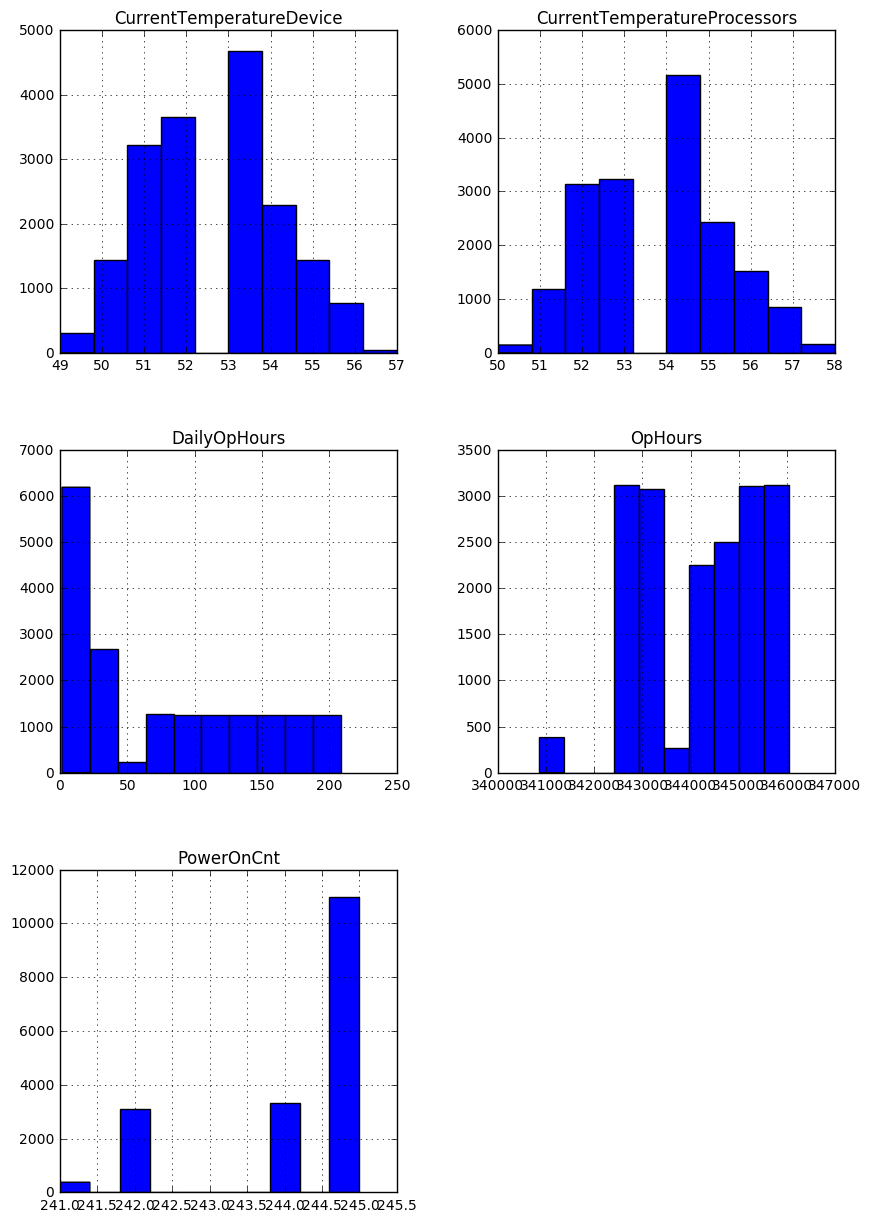

In [59]:
#histograms

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,15))
ax = fig.gca()
dataset.hist(ax = ax)
plt.show()

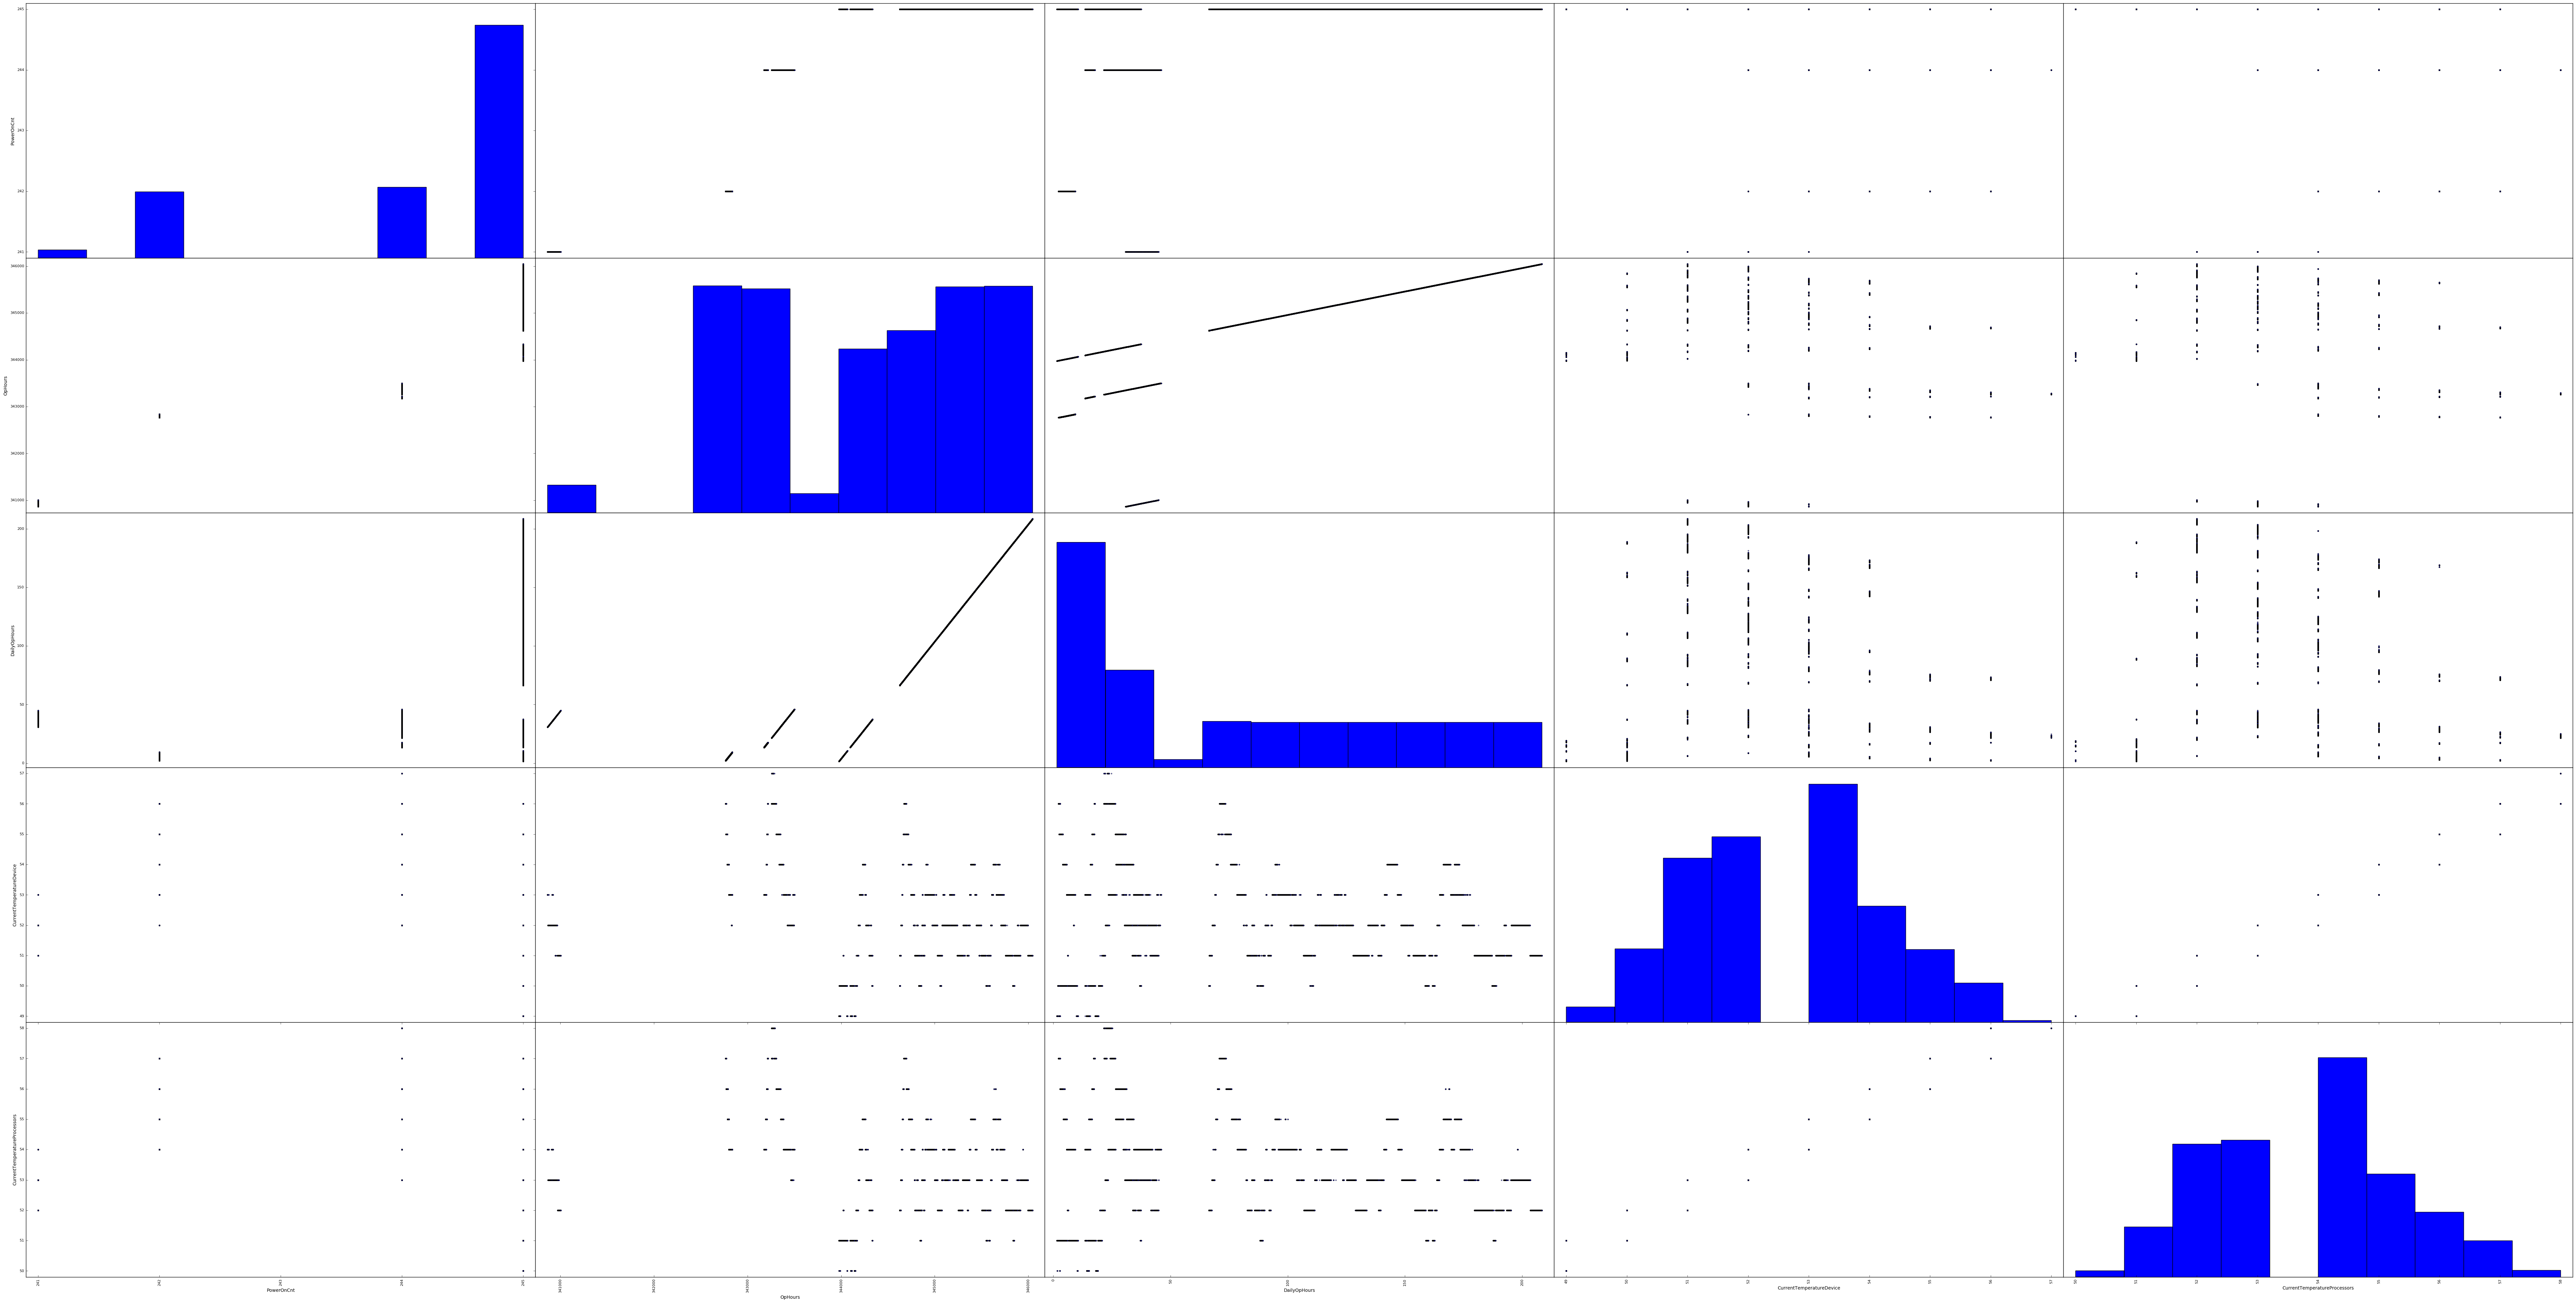

In [60]:
#scatter plots of all attributes

import warnings
warnings.filterwarnings("ignore")
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (100,50))
plt.show()

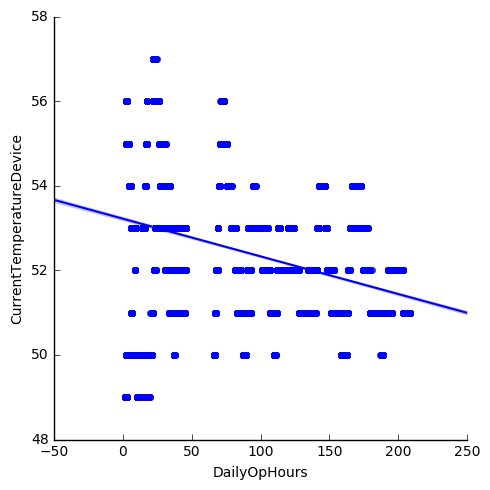

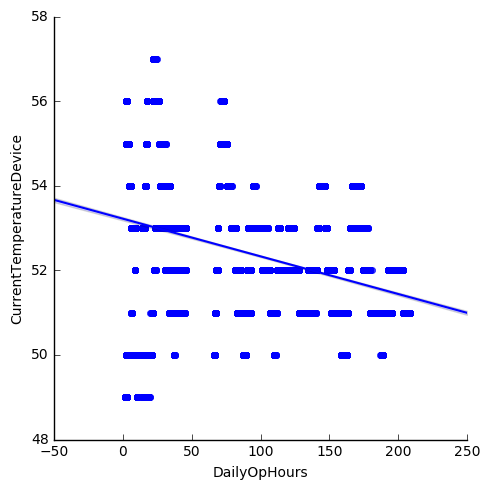

In [62]:
import seaborn as sns
sns.lmplot('DailyOpHours', 'CurrentTemperatureDevice', data = dataset)
plt.show()

In [78]:
#parsing code for xml data

import pandas as pd
import xml.etree.cElementTree as et
parsedXML = et.parse( 'test_xmldata.2017-07-04.xml')
dfcols = ['devicename','timestamp', 'deviceid', 'incr', 'tokenid', 'seqnb']

df = pd.DataFrame(columns=dfcols)

def getvalueofnode( node ):
    return node.text if node is not None else None

for node in parsedXML.getroot():
    devicename = node.find('devicename')
    timestamp = node.find('timestamp')
    deviceid = node.find('deviceid')
    incr = node.find('incr')
    tokenid = node.find('tokenid')
    seqnb = node.find('seqnb')
    
    df = df.append( pd.Series( [getvalueofnode(devicename), getvalueofnode(timestamp), getvalueofnode(deviceid), getvalueofnode(incr), getvalueofnode(tokenid), getvalueofnode(seqnb) ], index=dfcols) ,ignore_index=True)

print(df)

      devicename                timestamp deviceid   incr  \
0       PS06Test  2017-07-03T23:58:00.334       32  24665   
1       PS06Test  2017-07-03T23:58:02.224       32  27235   
2       PS06Test  2017-07-03T23:58:04.407       32  30210   
3       PS06Test  2017-07-03T23:58:06.358       32  32870   
4       PS06Test  2017-07-03T23:58:08.633       32  35970   
5       PS06Test  2017-07-03T23:58:12.066       32  40640   
6       PS06Test  2017-07-03T23:58:12.600       32  41370   
7       PS06Test  2017-07-03T23:58:15.204       32  44920   
8       PS06Test  2017-07-03T23:58:15.516       32  45350   
9       PS06Test  2017-07-03T23:58:16.511       32  46700   
10      PS06Test  2017-07-03T23:58:17.522       32  48075   
11      PS06Test  2017-07-03T23:58:18.792       32  49805   
12      PS06Test  2017-07-03T23:58:22.140       32  54370   
13      PS06Test  2017-07-03T23:58:24.005       32  56910   
14      PS06Test  2017-07-03T23:58:24.344       32  57370   
15      PS06Test  2017-0